<a href="https://colab.research.google.com/github/dntwaritag/Tensorflow-Participation-Assignment/blob/main/Tensorflow_Participation_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Denys Ntwaritaganzwa
Ruth Iradukunda

Complete the code as discussed the class :
Load any data of you choice
Make sure you clearly define the X and the Y after loading
Ensure the number of classes is accurate
Add atleast 1 layer with 128 neurons

compilte and fit to data
'''

'\nDenys Ntwaritaganzwa\nRuth Iradukunda\n\nComplete the code as discussed the class :\nLoad any data of you choice\nMake sure you clearly define the X and the Y after loading\nEnsure the number of classes is accurate\nAdd atleast 1 layer with 128 neurons\n\ncompilte and fit to data\n'

In [ ]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix, classification_report
import os

**Step 1: Load the MNIST Dataset**

In [ ]:
# The MNIST dataset contains 60,000 training images and 10,000 test images of handwritten digits (0-9)
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print("Dataset loaded successfully.")
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dataset loaded successfully.
Training Data Shape: (60000, 28, 28)
Testing Data Shape: (10000, 28, 28)


**Step 2: Preprocess the Data**

In [ ]:
# Normalize the image pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Flatten the images (28x28 pixels) into 1D arrays (784 features)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
# Convert labels to one-hot encoding
num_classes = len(np.unique(Y_train))  # 10 classes (digits 0-9)
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=num_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=num_classes)

In [ ]:
print(f"Number of Classes: {num_classes}")
print(f"Shape of Features (X_train): {X_train.shape}")
print(f"Shape of Labels (Y_train): {Y_train.shape}")

Number of Classes: 10
Shape of Features (X_train): (60000, 784)
Shape of Labels (Y_train): (60000, 10)


**Step 3: Build the Neural Network**

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input + Hidden Layer (128 neurons)
    Dense(64, activation='relu'),  # Additional Hidden Layer (64 neurons)
    Dense(num_classes, activation='softmax')  # Output Layer (10 neurons for 10 classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Display the model summary
print("Model Summary:")
model.summary()

Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

**Step 4: Compile the Model**

In [ ]:
model.compile(optimizer='adam',  # Efficient optimization algorithm
              loss='categorical_crossentropy',  # Suitable for multi-class classification
              metrics=['accuracy'])  # Track accuracy during training


**Step 5: Train the Model**

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8775 - loss: 0.4208 - val_accuracy: 0.9572 - val_loss: 0.1416
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9689 - loss: 0.1046 - val_accuracy: 0.9669 - val_loss: 0.1056
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9762 - loss: 0.0709 - val_accuracy: 0.9727 - val_loss: 0.0908
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9830 - loss: 0.0532 - val_accuracy: 0.9733 - val_loss: 0.0885
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9879 - loss: 0.0381 - val_accuracy: 0.9728 - val_loss: 0.0943
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9894 - loss: 0.0312 - val_accuracy: 0.9763 - val_loss: 0.0822
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9921 - loss: 0.0255 - val_accuracy: 0.9741 - val_loss: 0.1003
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9926 - loss: 0.0213

**Step 6: Save the Model**

In [ ]:
model_save_path = 'mnist_model.h5'
model.save(model_save_path)
print(f"Model saved at {model_save_path}.")

Model saved at mnist_model.h5.


**Step 7: Load the Model and Make Predictions**

In [ ]:
loaded_model = tf.keras.models.load_model(model_save_path)
predictions = loaded_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Convert predictions and actual labels back to class indices
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(Y_test, axis=1)

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = loaded_model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Loss: 0.1119
Test Accuracy: 97.57%


**Step 8: Visualize Predictions and Performance**

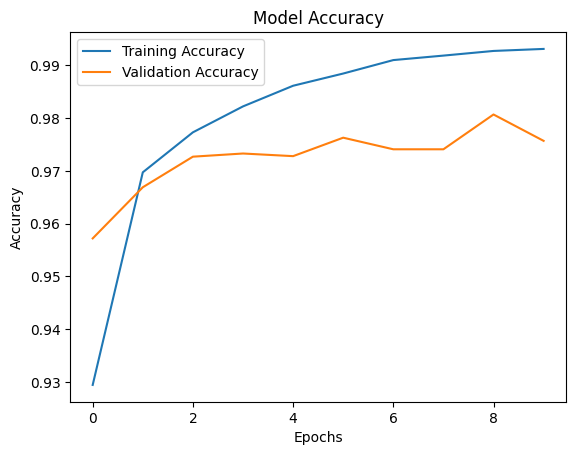

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

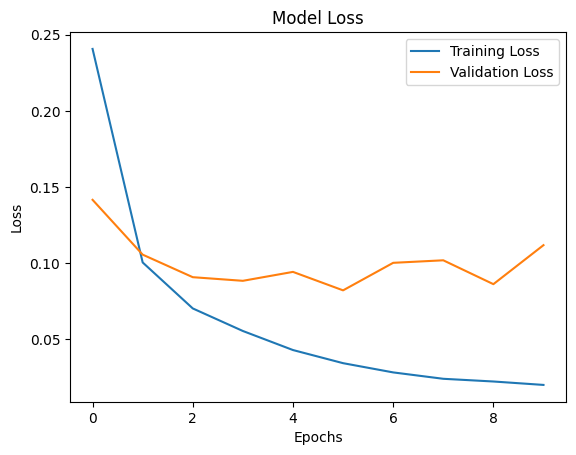

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

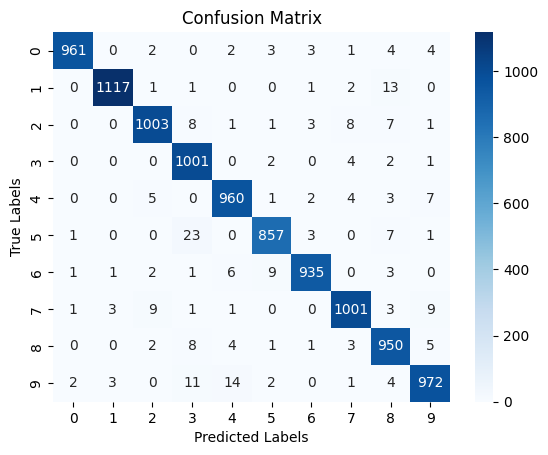

In [ ]:
# Display a confusion matrix
conf_matrix = confusion_matrix(actual_classes, predicted_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Print Classification Report
print("Classification Report:\n", classification_report(actual_classes, predicted_classes, target_names=[str(i) for i in range(10)]))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.96      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.95      0.98      0.96       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

